In [82]:
import pandas as pd
import re
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [42]:
df = pd.read_csv('output1.csv')
df = df.iloc[:, 2]

In [43]:
df

0       Bardzo ciekawe, według mnie, opracowanie #Ukra...
1       RT @propeertys: Jednym z powodów, dla których ...
2       RT @propeertys: 🇸🇮Słowenia przekaże 🇺🇦Ukrainie...
3       RT @propeertys: 🇸🇮Słowenia przekaże 🇺🇦Ukrainie...
4       .2345z #PeerTube CLIP https://t.co/OnDvp8AxN0 ...
                              ...                        
1396    RT @Mat_z_Katowic: Potężna zdobycz sił ukraińs...
1397    RT @propeertys: Ochotnicy z Izraela na #Ukrain...
1398    Ochotnicy z Izraela przybyli walczyć na Ukrain...
1399    RT @propeertys: Siły ukraińskie zaczęły używać...
1400    Ostrzał ukraiński pozycji rosyjskich w obwodzi...
Name: text, Length: 1401, dtype: object

In [44]:
def find_match(str):
  res = re.search('#(\w+)', str)
  if not res:
    return ''
  return res.group(1)

In [45]:
words = []
for row in df:
    words.append(find_match(row))

In [46]:
words = list(filter(None, words))

In [47]:
words = list(map(lambda x: x.lower(), words))

In [48]:
unique_words = {}
for word in words:
    if word not in unique_words:
        unique_words[word] = 1
    else:
        unique_words[word] += 1
unique_words

{'ukraine': 638,
 'peertube': 9,
 'humanrights': 7,
 'gandziuk': 1,
 'putin': 15,
 'russians': 5,
 'ukrainian': 2,
 'mariupol': 19,
 'war': 7,
 'polska': 4,
 'putinwarcriminal': 5,
 'ukraina': 15,
 'ukrainerussiawar': 4,
 'lendlease': 1,
 'staytogether': 1,
 'ukrainę': 6,
 'kiev': 20,
 'ipptv': 1,
 'quiz': 3,
 'uk': 9,
 'fighter': 4,
 'kadyrow': 1,
 'ma': 1,
 'azovstal': 6,
 'charkiv': 2,
 'irpin': 1,
 'warinukraine2022': 1,
 'gruz200': 1,
 'rsfpressfreedomaward': 1,
 'stopputin': 1,
 'specnaz': 3,
 'zelenskyy': 1,
 'rosji': 1,
 'rosja': 12,
 'gruzja': 1,
 'batumi': 1,
 'kaluga': 1,
 'warcrim': 1,
 'ukraineinvasion': 2,
 'żukow': 1,
 'wojnawukrainie': 5,
 'sejm': 1,
 'niemcy': 62,
 'russia': 14,
 'kyiv': 4,
 'denazyfikacja': 6,
 'buendomingo': 1,
 'киев': 2,
 'pomyśldziś': 3,
 'ukrainewar': 6,
 'slavaukraïni': 1,
 'tiktok': 1,
 'zelensky': 2,
 'russianwarcrimes': 4,
 'putinwarcrimes': 2,
 'wojnaukraina': 1,
 'russiasoldier': 1,
 'odessa': 5,
 'suchar': 1,
 'wojna': 4,
 'tegodnia': 10,


In [58]:
len(unique_words.keys())

117

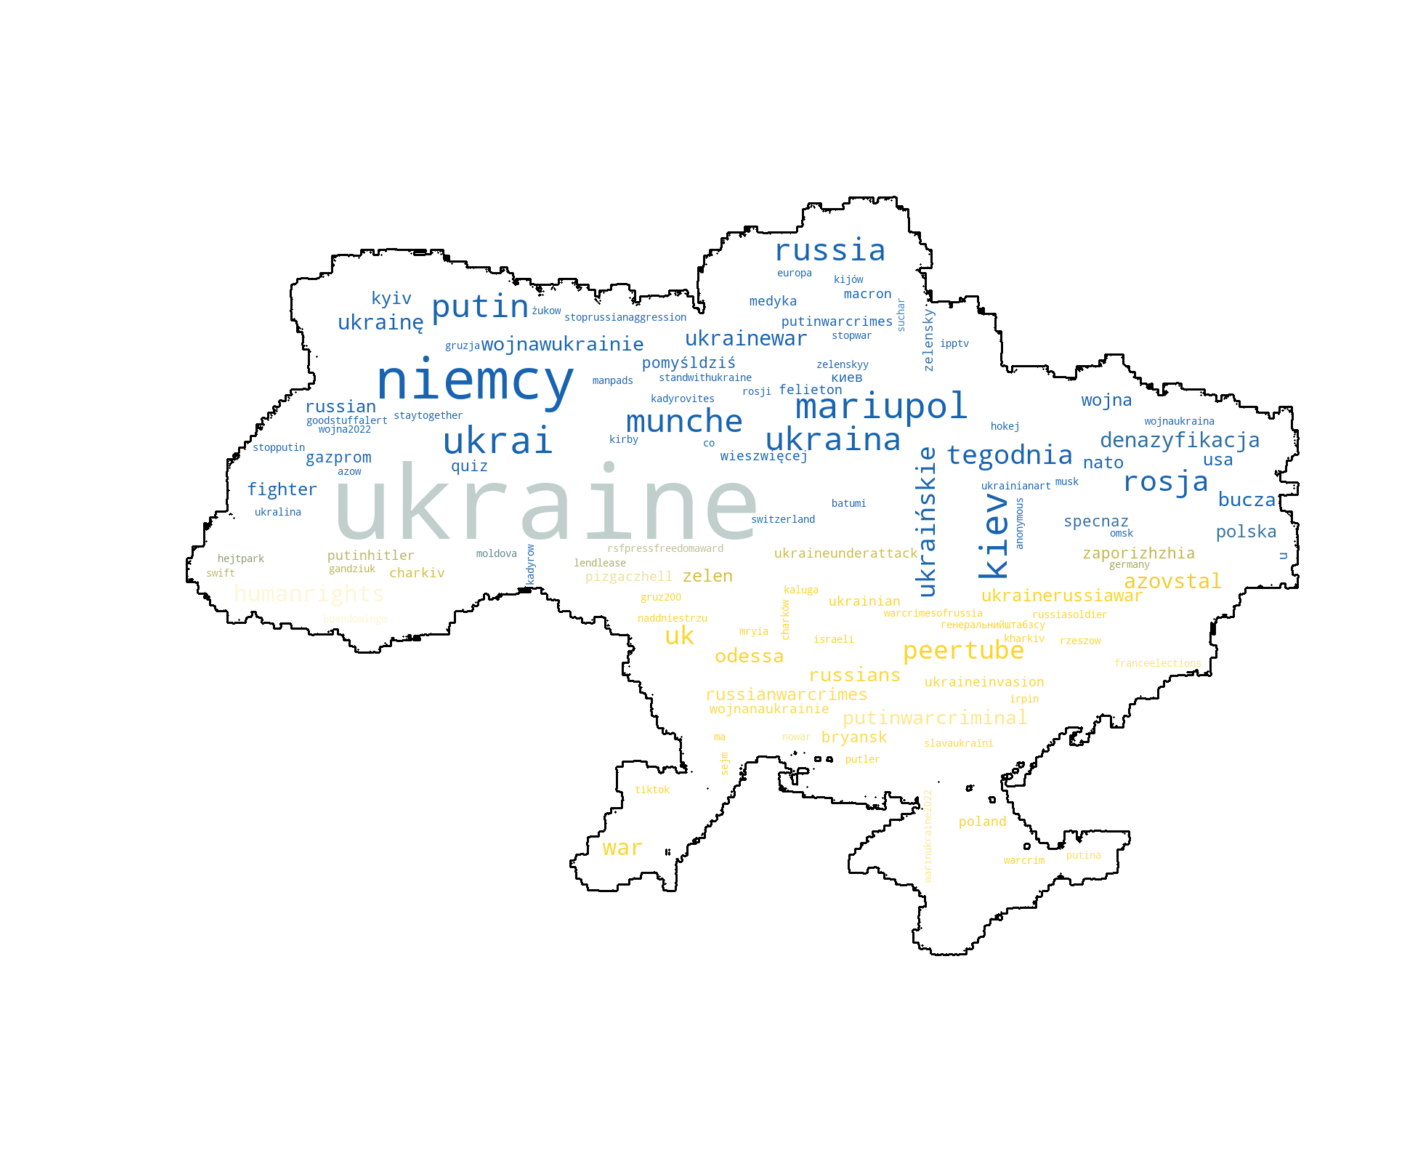

<Figure size 1800x1800 with 0 Axes>

In [141]:
mask = np.array(Image.open('/Users/Downloads/ukraine-flag-national-europe-emblem-map-icon-illustration-abstract-design-element-free-vector.webp'))
image_colors = ImageColorGenerator(mask)


wordcloud = WordCloud(colormap='RdYlGn',
                      background_color='white', 
                      contour_width = 2,
                      contour_color = 'black',
                      mask=mask).generate_from_frequencies(unique_words)


plt.rcParams["figure.figsize"] = (25,25)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('hashcloud.png')